In [3]:
#False = 0, True = 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('Heart Disease Predictions.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#0 = without heart disease, 1 = with heart disease.
df.shape

(5508, 12)

In [7]:
df['HeartDisease'].value_counts()

HeartDisease
1    3048
0    2460
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5508 non-null   int64  
 1   Sex             5508 non-null   object 
 2   ChestPainType   5508 non-null   object 
 3   RestingBP       5508 non-null   int64  
 4   Cholesterol     5508 non-null   int64  
 5   FastingBS       5508 non-null   int64  
 6   RestingECG      5508 non-null   object 
 7   MaxHR           5508 non-null   int64  
 8   ExerciseAngina  5508 non-null   object 
 9   Oldpeak         5508 non-null   float64
 10  ST_Slope        5508 non-null   object 
 11  HeartDisease    5508 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 516.5+ KB


In [5]:
#Checking for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

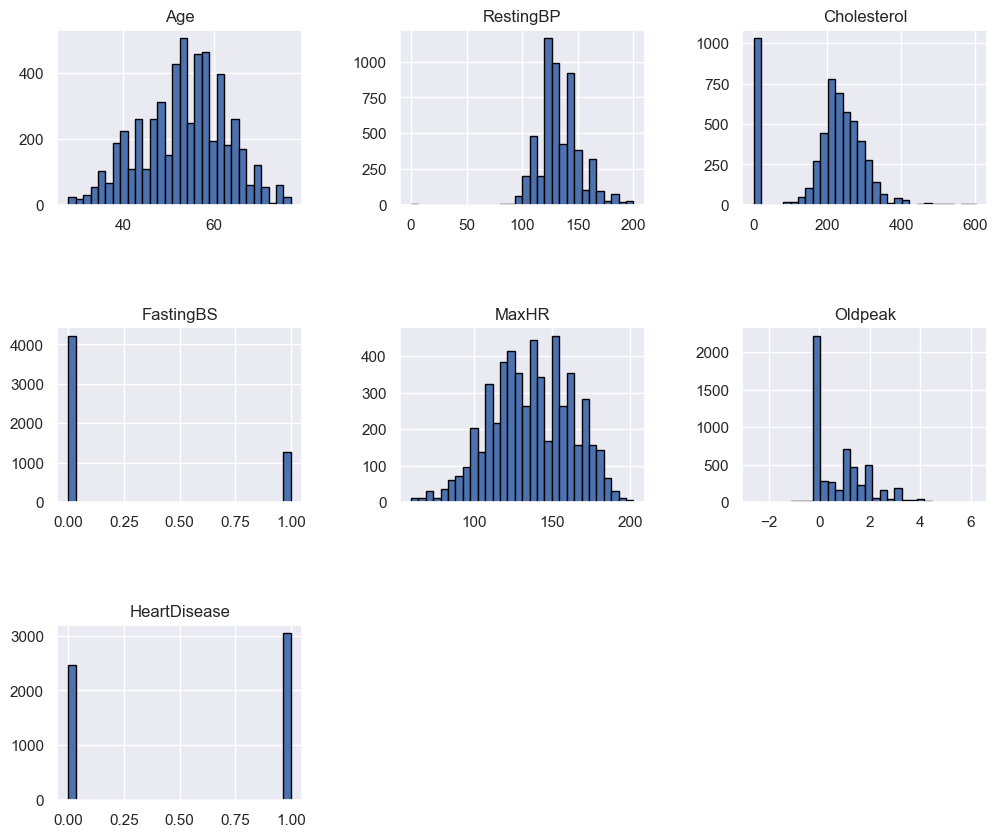

In [6]:
#From the histogram below, it was observed that both the Cholesterol and RestingBP cols are skewed. 
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.428333,18.505747,109.334476,0.422854,25.448773,1.066086,0.497188
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [44]:
#Define functons to remove outliers
#outliers in the Cholesterol and RestingBP columns were removed

def drop_outlier(data, var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop = True, inplace = True)
    return data

In [70]:
df_chols = drop_outlier(df, 'Cholesterol')
df_chols

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
4406,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
4407,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
4408,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

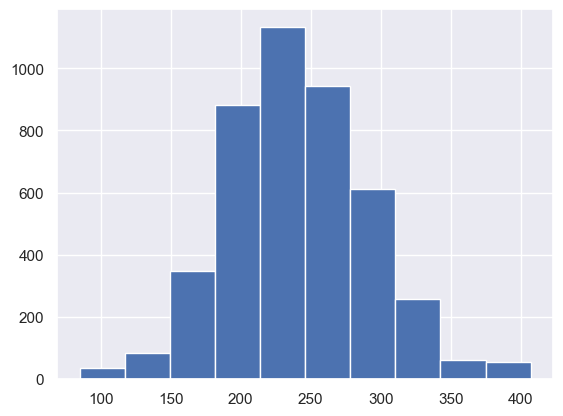

In [71]:
df_chols['Cholesterol'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d457cc5910>,
 'caps': [<matplotlib.lines.Line2D at 0x1d455406490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4552bce50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d454f0f210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d454f0ed50>],
 'means': []}

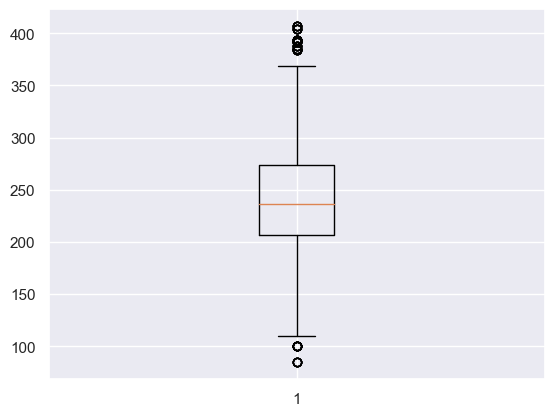

In [88]:
plt.boxplot(df_chols['Cholesterol'])

In [72]:
df_chols1 = drop_outlier(df, 'RestingBP')
df_chols1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5251,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
5252,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
5253,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
5254,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: >

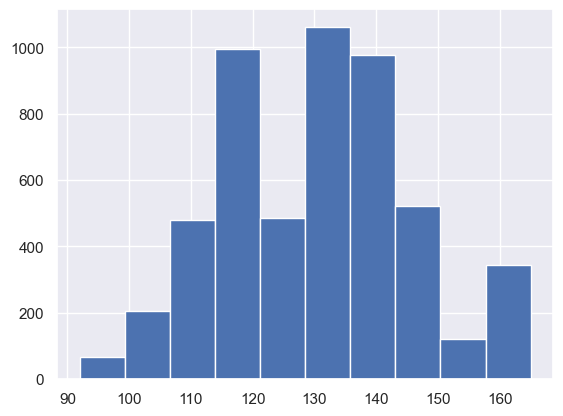

In [73]:
df_chols1['RestingBP'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d454fef1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d454fecbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d454fefa50>],
 'medians': [<matplotlib.lines.Line2D at 0x1d454feed10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d455280b90>],
 'means': []}

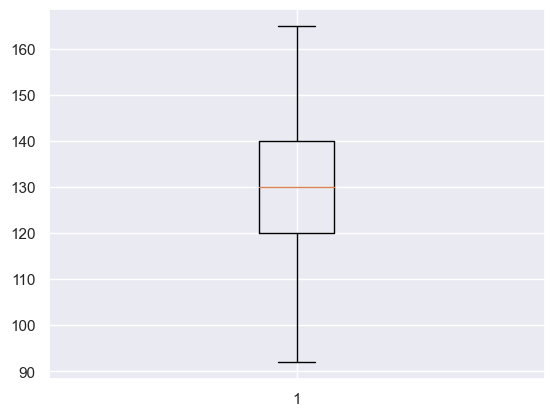

In [90]:
plt.boxplot(df_chols1['RestingBP'])

In [58]:
#trying to seek the relatonship btw age $ heart disease, 0 =without heartdisease, 1 =with heartdisease
PT_AGE_HD = df_chols['Age'][df_chols['HeartDisease']==1].value_counts().to_frame().reset_index()
PT_AGE_HD

,Age,count
0,57,150
1,58,150
2,62,150
3,61,144
4,60,144
5,56,132
6,55,126
7,63,126
8,54,120
9,59,114


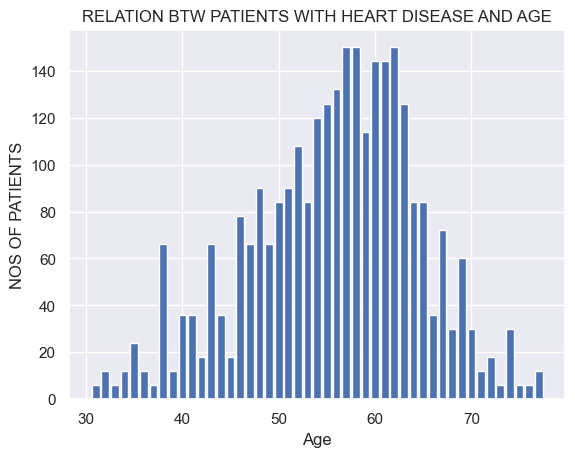

In [59]:
#barchart showing the relatonship btw age and heart disease
y = PT_AGE_HD['count']
x = PT_AGE_HD['Age']

plt.bar(x, y)
plt.title('RELATION BTW PATIENTS WITH HEART DISEASE AND AGE')
plt.xlabel('Age')
plt.ylabel('NOS OF PATIENTS')
plt.show()

In [60]:
#trying to seek the relatonship btw sex $heart disease. 0 =without heartdisease, 1 =with heartdisease.
PT_SEX_HD = df_chols['Sex'][df_chols['HeartDisease']==1].value_counts().to_frame().reset_index()
PT_SEX_HD

,Sex,count
0,M,2616
1,F,258


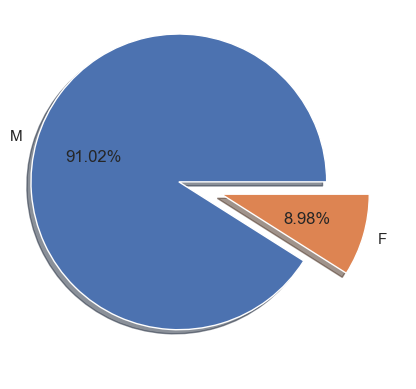

In [61]:
#Pie chart showing the gender percentages of patients with heart disease
y = PT_SEX_HD['count']
x = PT_SEX_HD['Sex']
plt.pie(y, labels=x, explode=[0.3, 0], autopct='%1.2f%%', shadow=True)
plt.show()

In [63]:
#Checking for the major Chest pain type present in patients with heart disease
PT_CPT_HD = df_chols['ChestPainType'][df_chols['HeartDisease']==1].value_counts().to_frame().reset_index()
PT_CPT_HD

,ChestPainType,count
0,ASY,2226
1,NAP,408
2,ATA,126
3,TA,114


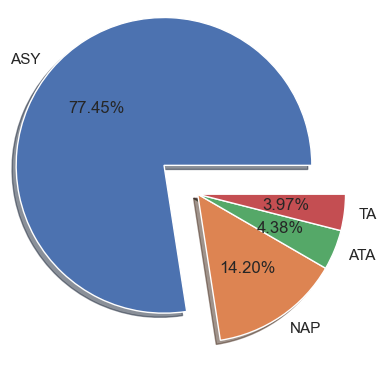

In [64]:
#Pie chart showing the ChestPainTypes percentages of patients with heart disease
y = PT_CPT_HD['count']
x = PT_CPT_HD['ChestPainType']
plt.pie(y, labels=x, explode=[0.3,0, 0, 0], autopct='%1.2f%%', shadow=True)
plt.show()
#Predominantly patients with ASY Chest pain types are more at risk of a heart disease

In [ ]:
# Medical Range of values for cholesterol levels; Normal: Less than 150 mg/dL, 
#Borderline high: 150 to 199 mg/dL, High: 200 to 499 mg/dL, Very high: Above 500 mg/dL

In [77]:
#Checking for the major Cholesterol level of patients with heart disease
PT_CHOLS_HD = df_chols['Cholesterol'][df_chols['HeartDisease']==1].value_counts().to_frame().reset_index()
PT_CHOLS_HD

,Cholesterol,count
0,282,42
1,254,36
2,216,36
3,230,30
4,289,30
...,...,...
163,153,6
164,100,6
165,201,6
166,242,6


In [81]:
PT_CHOLS_HD2 = df_chols['Cholesterol'][df_chols['HeartDisease']==0].value_counts().to_frame().reset_index()
PT_CHOLS_HD2

,Cholesterol,count
0,240,48
1,220,48
2,211,42
3,215,36
4,195,36
...,...,...
158,190,6
159,169,6
160,310,6
161,165,6


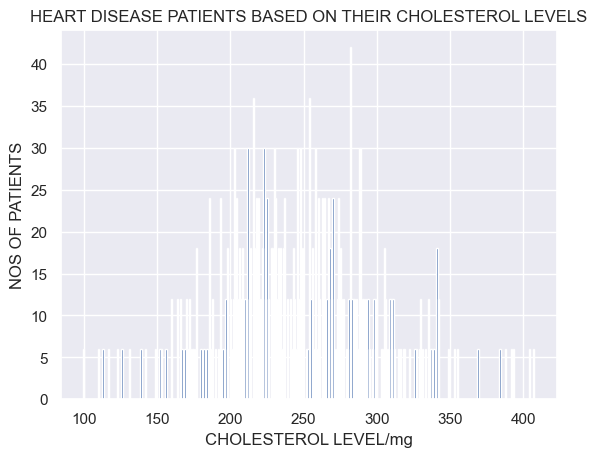

In [82]:
#Plotting ts barchart
y = PT_CHOLS_HD['count']
x = PT_CHOLS_HD['Cholesterol']

plt.bar(x, y)
plt.title('HEART DISEASE PATIENTS BASED ON THEIR CHOLESTEROL LEVELS')
plt.xlabel('CHOLESTEROL LEVEL/mg')
plt.ylabel('NOS OF PATIENTS')
plt.show()

#From the dataset gievn,there does not seem to be a drect relationshp btw cholesterol and heartdisease.

In [84]:
PT_RBP_HD = df_chols1['RestingBP'][df_chols1['HeartDisease']==1].value_counts().to_frame().reset_index()
PT_RBP_HD

,RestingBP,count
0,120,330
1,140,330
2,130,312
3,160,204
4,110,192
5,150,180
6,125,114
7,145,90
8,115,90
9,135,72


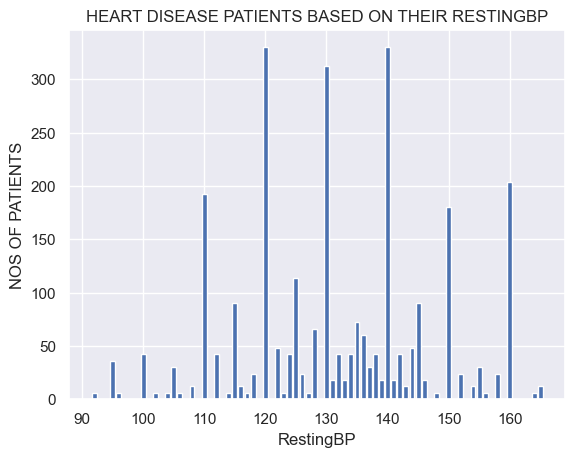

In [85]:
#Plotting its barchart
y = PT_RBP_HD['count']
x = PT_RBP_HD['RestingBP']

plt.bar(x, y)
plt.title('HEART DISEASE PATIENTS BASED ON THEIR RESTINGBP')
plt.xlabel('RestingBP')
plt.ylabel('NOS OF PATIENTS')
plt.show()

In [86]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)